In [1]:
import firebase_admin
from firebase_admin import credentials

cred = credentials.Certificate("supixel-7e991-firebase-adminsdk-sxj09-ed5cafdc31.json")
app = firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://supixel-7e991.firebaseio.com/'
})

In [2]:
# get firestore database quiz_responses collection from firebase
from firebase_admin import firestore
db = firestore.client()
quiz_responses = db.collection(u'quiz_responses')

# get all documents from quiz_responses collection
docs = quiz_responses.stream()

# create a list of all documents
doc_list = []
for doc in docs:
    doc_list.append(doc.to_dict())

In [3]:
doc_list

[{'score': 4,
  'userAnswer': [{'question_name': 'question_realb_bcb51a58-9cee-4e04-b830-8baf47f454b5.jpg',
    'user_answer': 'b',
    'is_correct': True,
    'is_viewed_detail': False},
   {'question_name': 'question_realb_c7135b21-416e-4de5-9b28-8ac41b76a09c.jpg',
    'user_answer': 'b',
    'is_correct': True,
    'is_viewed_detail': False},
   {'question_name': 'question_reala_a0d9fae0-95cb-496c-9e4d-877277823cef.JPG',
    'user_answer': 'b',
    'is_correct': False,
    'is_viewed_detail': False},
   {'question_name': 'question_reala_c8a4df2d-4c91-4fcd-8f92-9f14e350abe6.jpg',
    'user_answer': 'a',
    'is_correct': True,
    'is_viewed_detail': False},
   {'question_name': 'question_realb_dd6769ec-e3de-433d-8438-8a5f1284ccc9.jpg',
    'user_answer': 'a',
    'is_correct': False,
    'is_viewed_detail': False},
   {'question_name': 'question_decoyr_468da7e3-aaeb-4c2b-ba3e-5fd9f6119214.jpg',
    'user_answer': 'b',
    'is_correct': False,
    'is_viewed_detail': False},
   {'que

In [4]:
print("Jumlah sesi turing test yang telah dilakukan: ", len(doc_list))
print("Jumlah pertanyaan turing yang telah dijawab: ", len(doc_list)*10)

Jumlah sesi turing test yang telah dilakukan:  38
Jumlah pertanyaan turing yang telah dijawab:  380


In [5]:
# doc_list[index]['userAnswer'][index]['question_name']
print("Jumlah pertanyaan unique yang telah dijawab: ", len(set([doc['userAnswer'][i]['question_name'] for doc in doc_list for i in range(10)])))

Jumlah pertanyaan unique yang telah dijawab:  97


In [6]:
# get unique question names
unique_question_name = list(set([doc['userAnswer'][i]['question_name'] for doc in doc_list for i in range(10)]))
print(unique_question_name)

['question_reala_7cfce00a-59bb-48bc-9fd2-4ed8635568f2.jpg', 'question_decoyr_468da7e3-aaeb-4c2b-ba3e-5fd9f6119214.jpg', 'question_decoyr_6704da00-8487-4b9f-8b21-0133759d94d8.JPG', 'question_realb_9f65a93f-acef-4eba-83ee-0f859a2eb197.JPG', 'question_decoyr_28e437b9-f7de-4547-a7ad-1ab76fc6aec3.JPG', 'question_decoyr_c7135b21-416e-4de5-9b28-8ac41b76a09c.jpg', 'question_decoyg_b00b98f4-cd7f-409a-8b80-113fd0460aa3.JPG', 'question_reala_e1b2111d-2ba1-40cf-a692-3540d25567c4.jpg', 'question_realb_b00b98f4-cd7f-409a-8b80-113fd0460aa3.JPG', 'question_reala_468da7e3-aaeb-4c2b-ba3e-5fd9f6119214.jpg', 'question_decoyr_aeb5ed55-799b-44ed-a621-b2186fac21d9.jpg', 'question_reala_dd6769ec-e3de-433d-8438-8a5f1284ccc9.jpg', 'question_decoyr_5cda2bbf-80f3-4087-8615-1926f894b348.jpg', 'question_realb_c7135b21-416e-4de5-9b28-8ac41b76a09c.jpg', 'question_realb_6704da00-8487-4b9f-8b21-0133759d94d8.JPG', 'question_decoyr_117bc6ab-216a-41be-94bd-d9d64fbd9eef.jpg', 'question_realb_cec11bfe-d151-4bfa-8247-3348a79

In [7]:
# question_[decoy/real][a/b]_filename

unique_decoy_question = [question for question in unique_question_name if question.startswith('question_decoy')]
unique_real_question = [question for question in unique_question_name if question.startswith('question_real')]

print("Jumlah pertanyaan decoy unik yang telah dijawab: ", len(unique_decoy_question))
print("Jumlah pertanyaan real unik yang telah dijawab: ", len(unique_real_question))

Jumlah pertanyaan decoy unik yang telah dijawab:  41
Jumlah pertanyaan real unik yang telah dijawab:  56


In [8]:
# from doc_list, get all decoy questions
decoy_question = [doc['userAnswer'][i]['question_name'] for doc in doc_list for i in range(10) if doc['userAnswer'][i]['question_name'].startswith('question_decoy')]
real_question = [doc['userAnswer'][i]['question_name'] for doc in doc_list for i in range(10) if doc['userAnswer'][i]['question_name'].startswith('question_real')]

print("Jumlah pertanyaan decoy yang telah dijawab: ", len(decoy_question))
print("Jumlah pertanyaan real yang telah dijawab: ", len(real_question))
print("total pertanyaan: ", len(decoy_question)+len(real_question))

Jumlah pertanyaan decoy yang telah dijawab:  74
Jumlah pertanyaan real yang telah dijawab:  306
total pertanyaan:  380


In [9]:
# convert to dataframe
import pandas as pd

temp = doc_list

turing_session = []

for i in range(len(temp)):
    for j in range(10):
        row = {}
        row["session_id"] = i
        row["user_id"] = temp[i]['username']
        row["cumulative_score"] = temp[i]['score']

        row["question_name"] = temp[i]['userAnswer'][j]['question_name']
        row["question_type"] = 'decoy' if temp[i]['userAnswer'][j]['question_name'].startswith('question_decoy') else 'real'
        row["question_answer"] = temp[i]['userAnswer'][j]['question_name'].split('_')[-2][-1]
        row["user_answer"] = temp[i]['userAnswer'][j]['user_answer']
        row["is_correct"] = temp[i]['userAnswer'][j]['is_correct']
        row["is_zooming"] = temp[i]['userAnswer'][j]['is_viewed_detail']
        
        turing_session.append(row)

turing_session = pd.DataFrame(turing_session)
turing_session.head()

turing_session.to_csv('turing_session.csv', index=False)


In [10]:
turing_session.head()

,session_id,user_id,cumulative_score,question_name,question_type,question_answer,user_answer,is_correct,is_zooming
0,0,BEAT MBER,4,question_realb_bcb51a58-9cee-4e04-b830-8baf47f...,real,b,b,True,False
1,0,BEAT MBER,4,question_realb_c7135b21-416e-4de5-9b28-8ac41b7...,real,b,b,True,False
2,0,BEAT MBER,4,question_reala_a0d9fae0-95cb-496c-9e4d-8772778...,real,a,b,False,False
3,0,BEAT MBER,4,question_reala_c8a4df2d-4c91-4fcd-8f92-9f14e35...,real,a,a,True,False
4,0,BEAT MBER,4,question_realb_dd6769ec-e3de-433d-8438-8a5f128...,real,b,a,False,False


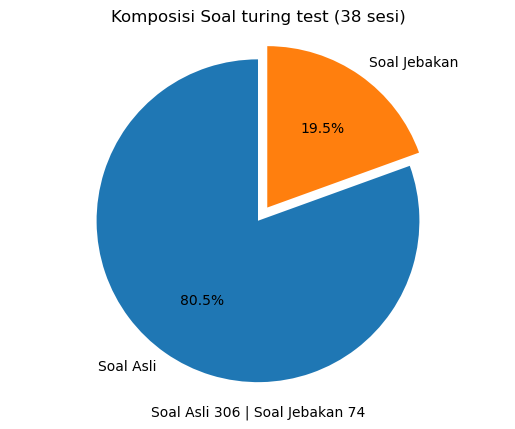

In [11]:
# draw pie chart for decoy and real question

import matplotlib.pyplot as plt
import numpy as np

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
title = 'Komposisi Soal turing test (38 sesi)'
subtitle = f'Soal Asli {len(real_question)} | Soal Jebakan {len(decoy_question)}'
labels = f'Soal Asli', f'Soal Jebakan'
sizes = [len(real_question), len(decoy_question)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Decoy')

fig1, ax1 = plt.subplots()
ax1.set_title(title)
ax1.set_xlabel(subtitle)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()

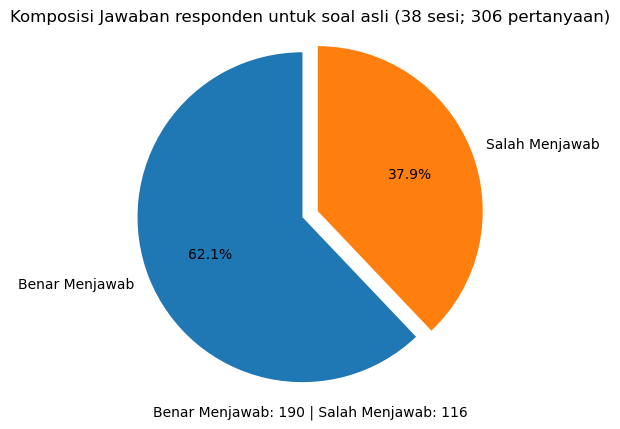

In [12]:

real_question_correct = len([doc['userAnswer'][i]['question_name'] for doc in doc_list for i in range(10) if doc['userAnswer'][i]['question_name'].startswith('question_real') and doc['userAnswer'][i]['is_correct']])
decoy_question_correct = len([doc['userAnswer'][i]['question_name'] for doc in doc_list for i in range(10) if doc['userAnswer'][i]['question_name'].startswith('question_decoy') and doc['userAnswer'][i]['is_correct']])
real_question_wrong = len(real_question) - real_question_correct
decoy_question_wrong = len(decoy_question) - decoy_question_correct

title = "Komposisi Jawaban responden untuk soal asli (38 sesi; 306 pertanyaan)"
subtitle = f"Benar Menjawab: {real_question_correct} | Salah Menjawab: {real_question_wrong}"
labels = f'Benar Menjawab', f'Salah Menjawab'
sizes = [real_question_correct, real_question_wrong]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Decoy')

fig1, ax1 = plt.subplots()
ax1.set_title(title)
ax1.set_xlabel(subtitle)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



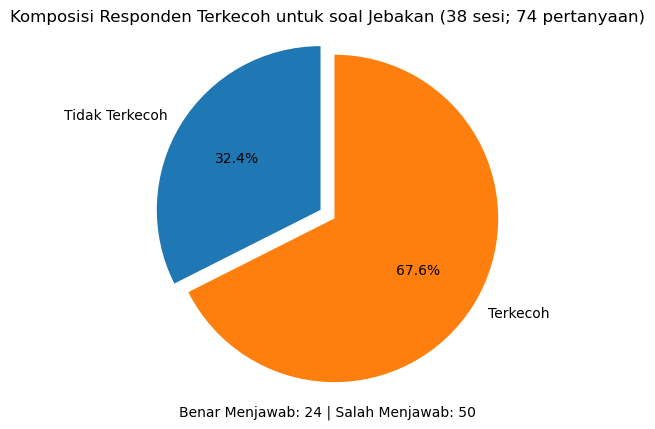

In [13]:
decoy_question_correct = len([doc['userAnswer'][i]['question_name'] for doc in doc_list for i in range(10) if doc['userAnswer'][i]['question_name'].startswith('question_decoy') and doc['userAnswer'][i]['is_correct']])
decoy_question_wrong = len(decoy_question) - decoy_question_correct

title = "Komposisi Responden Terkecoh untuk soal Jebakan (38 sesi; 74 pertanyaan)"
subtitle = f"Benar Menjawab: {decoy_question_correct} | Salah Menjawab: {decoy_question_wrong}"
labels = f'Tidak Terkecoh', f'Terkecoh'
sizes = [decoy_question_correct, decoy_question_wrong]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Decoy')

fig1, ax1 = plt.subplots()
ax1.set_title(title)
ax1.set_xlabel(subtitle)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

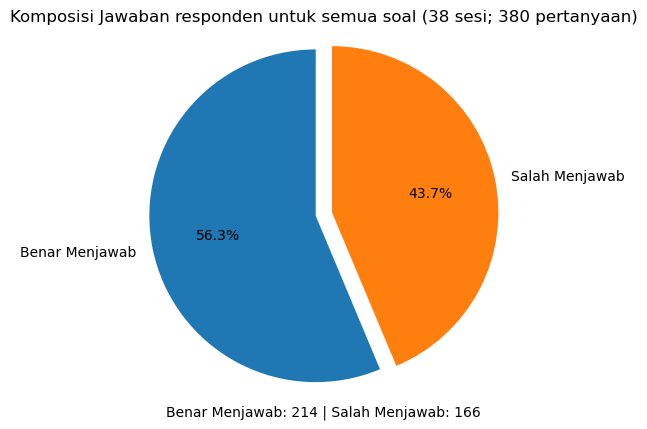

In [15]:
all_question_correct = len([doc['userAnswer'][i]['question_name'] for doc in doc_list for i in range(10) if doc['userAnswer'][i]['is_correct']])
all_question_wrong = len(decoy_question) + len(real_question) - all_question_correct

title = "Komposisi Jawaban responden untuk semua soal (38 sesi; 380 pertanyaan)"
subtitle = f"Benar Menjawab: {all_question_correct} | Salah Menjawab: {all_question_wrong}"
labels = f'Benar Menjawab', f'Salah Menjawab'
sizes = [all_question_correct, all_question_wrong]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Decoy')

fig1, ax1 = plt.subplots()
ax1.set_title(title)
ax1.set_xlabel(subtitle)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()